In [1]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManilaV2

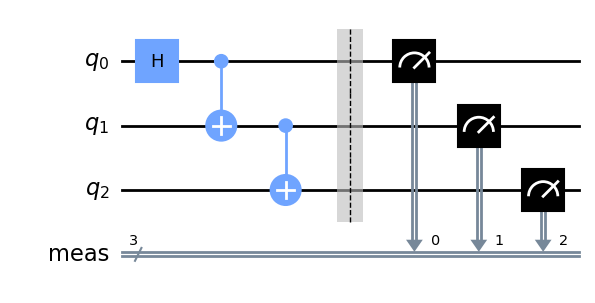

In [4]:
# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()
circ.draw('mpl')

In [5]:
# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = aersim.run(circ).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)

Counts(ideal): {'000': 508, '111': 516}


In [7]:
# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)

# Perform noisy simulation
result_noise = aersim_backend.run(circ).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)

Counts(noise): {'101': 11, '100': 15, '001': 76, '010': 11, '000': 382, '011': 21, '111': 437, '110': 71}


### qiskit aer study

In [8]:
from qiskit_aer import AerSimulator, AerProvider, StatevectorSimulator

In [9]:
AerProvider().backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

StatevectorSimulator

In [12]:
backend = StatevectorSimulator()

In [112]:
print('backend name:',backend.name)
# print('backend version:',backend.version)
print('backend description:',backend.description)
print('backend online_date:',backend.online_date)
print('backend_version:',backend.backend_version)

backend name: statevector_simulator
backend description: A C++ statevector circuit simulator
backend online_date: None
backend_version: 0.13.1


Backend Options

In [128]:
# device
print(backend.available_devices())
# backend.set_options(device='gpu')
backend.set_options(device='cpu')

('CPU', 'GPU')


In [74]:
# method [DEPRECATED]
# backend.set_options(method='statevector_gpu')
# backend.set_options(method='statevector')

In [75]:
# precision
# backend.set_options(precision="single")
backend.set_options(precision="double")

In [77]:
# executor (futures.Executor)
# Set a custom executor for asynchronous running of simulation jobs (Default: None)
backend.set_options(executor=None)

In [78]:
# max_job_size (int or None) 
# If the number of run circuits exceeds this value simulation will be run as a set of of sub-jobs on the executor. 
# If None simulation of all circuits aer submitted to the executor as a single job (Default: None).
backend.set_options(max_job_size=None)

In [79]:
# max_shot_size (int or None)
# If None circuits will not be split based on shots.
# When splitting circuits use the max_job_size option to control how these split circuits should be submitted to the executor (Default: None).
backend.set_options(max_shot_size=None)

In [80]:
# zero_threshold (double) 
# Sets the threshold for truncating small values to zero in the result data (Default: 1e-10).
backend.set_options(zero_threshold=1e-10)

In [81]:
# validation_threshold (double) 
# Sets the threshold for checking if the initial statevector is valid (Default: 1e-8).
backend.set_options(validation_threshold=1e-8)

In [82]:
# max_parallel_threads (int) 
# Sets the maximum number of CPU cores used by OpenMP for parallelization. 
# If set to 0 the maximum will be set to the number of CPU cores (Default: 0).
backend.set_options(max_parallel_threads=0)

In [83]:
# max_parallel_experiments (int) 
# Sets the maximum number of qobj experiments that may be executed in parallel up to the max_parallel_threads value.
# If set to 1 parallel circuit execution will be disabled. 
# If set to 0 the maximum will be automatically set to max_parallel_threads (Default: 1)
backend.set_options(max_parallel_experiments=0)

In [116]:
# max_memory_mb (int)
# Sets the maximum size of memory to store a state vector. 
# If a state vector needs more, an error is thrown. In general, a state vector of n-qubits uses 2^n complex values (16 Bytes).  
# If set to 0, the maximum will be automatically set to the system memory size (Default: 0).
backend.set_options(max_memory_mb=0)

In [117]:
# statevector_parallel_threshold (int)
# Sets the threshold that “n_qubits” must be greater than to enable OpenMP parallelization for matrix multiplication during execution of an experiment. 
# If parallel circuit or shot execution is enabled this will only use unallocated CPU cores up to max_parallel_threads. 
# Note that setting this too low can reduce performance (Default: 14).
backend.set_options(statevector_parallel_threshold=25)

In [119]:
# fusion_enable (bool): Enable fusion optimization in circuit optimization passes [Default: True]
backend.set_options(fusion_enable=1)

In [120]:
# fusion_verbose (bool): Output gates generated in fusion optimization into metadata [Default: False]
backend.set_options(fusion_verbose=0)

In [121]:
# fusion_max_qubit (int): Maximum number of qubits for a operation generated in a fusion optimization [Default: 5]
backend.set_options(fusion_max_qubit=5)

In [122]:
# fusion_threshold (int): Threshold that number of qubits must be greater than or equal to enable fusion optimization [Default: 14]
backend.set_options(fusion_threshold=14)

In [123]:
# Attributes
# print(backend.instruction_durations)
# print(backend.instruction_schedule_map)
# print(backend.instructions)
# print(backend.max_circuits)
print('num_qubits:',backend.num_qubits)
# print(backend.operation_names)
# print(backend.operations)
print('backend opt:',backend.options)
print('provider:',backend.provider)
# print(backend.target)

num_qubits: 29
backend opt: Options(shots=1, device='cpu', precision='double', executor=None, max_job_size=None, max_shot_size=None, zero_threshold=1e-10, validation_threshold=1e-08, max_parallel_threads=0, max_parallel_experiments=0, max_parallel_shots=None, max_memory_mb=0, seed_simulator=None, fusion_enable=1, fusion_verbose=0, fusion_max_qubit=5, fusion_threshold=14, statevector_parallel_threshold=25)
provider: None


In [138]:
backend_full = StatevectorSimulator(shots=1000, 
                               device='cpu', 
                               precision='double', 
                               executor=None, 
                               max_job_size=None, 
                               max_shot_size=None, 
                               zero_threshold=1e-10, 
                               validation_threshold=1e-08, 
                               max_parallel_threads=0, 
                               max_parallel_experiments=0, 
                               max_parallel_shots=None, 
                               max_memory_mb=0, 
                               seed_simulator=None, 
                               fusion_enable=1, 
                               fusion_verbose=0, 
                               fusion_max_qubit=5, 
                               fusion_threshold=14, 
                               statevector_parallel_threshold=25
                            )

In [134]:
print('backend opt:',backend_full.options)

backend opt: Options(shots=1000, device='cpu', precision='double', executor=None, max_job_size=None, max_shot_size=None, zero_threshold=1e-10, validation_threshold=1e-08, max_parallel_threads=0, max_parallel_experiments=0, max_parallel_shots=None, max_memory_mb=0, seed_simulator=None, fusion_enable=1, fusion_verbose=0, fusion_max_qubit=5, fusion_threshold=14, statevector_parallel_threshold=25)


Backend Method

In [135]:
backend_full.clear_options()

In [136]:
print('backend opt:',backend_full.options)

backend opt: Options(shots=1, device='CPU', precision='double', executor=None, max_job_size=None, max_shot_size=None, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=None, max_parallel_experiments=None, max_parallel_shots=None, max_memory_mb=None, seed_simulator=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=5, fusion_threshold=14, statevector_parallel_threshold=14)


In [131]:
print(backend.available_devices())
print(backend.available_methods())
print(backend.configuration())
print(backend.status())
print(backend.properties())

('CPU', 'GPU')
('statevector',)
None


In [137]:
backend_full.get_translation_stage_plugin()

'aer_backend_plugin'

AerSimulator

In [149]:
backend = AerSimulator()
print('backend opt:',backend.options)

backend opt: Options(shots=1024, method='automatic', device='CPU', precision='double', executor=None, max_job_size=None, max_shot_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=None, max_parallel_experiments=None, max_parallel_shots=None, max_memory_mb=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=None, fusion_threshold=None, accept_distributed_results=None, memory=None, noise_model=None, seed_simulator=None, cuStateVec_enable=False, blocking_qubits=None, blocking_enable=False, chunk_swap_buffer_qubits=None, batched_shots_gpu=False, batched_shots_gpu_max_qubits=16, num_threads_per_device=1, shot_branching_enable=False, shot_branching_sampling_enable=False, statevector_parallel_threshold=14, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_err

In [154]:
print('backend name:',backend.name)
print('backend description:',backend.description)
print('backend online_date:',backend.online_date)
print('backend_version:',backend.backend_version)
print('available_methods:',backend.available_methods())
print('available_devices:',backend.available_devices())

backend name: aer_simulator
backend description: A C++ QasmQobj simulator with noise
backend online_date: None
backend_version: 0.13.1
available_methods: ('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop', 'tensor_network')
available_devices: ('CPU', 'GPU')


method='statevector' CPU

In [157]:
backend = AerSimulator(method='statevector', 
                       device='cpu',
                       precision='double', # "single" or "double"
                       executor=None, 
                       max_job_size=None, 
                       max_shot_size=None, 
                       enable_truncation=True,
                       zero_threshold=1e-10,
                       validation_threshold=1e-08,
                       max_parallel_threads=0,      # maximum number of CPU cores used by OpenMP for parallelization
                       max_parallel_experiments=1,  # maximum number of qobj experiments that may be executed in parallel
                       max_parallel_shots=0,        # maximum number of shots that may be executed in parallel during each experiment execution
                       max_memory_mb=0,             # maximum size of memory to store a state vector
                       cuStateVec_enable=False,
                       blocking_enable=False,       # enables parallelization with multiple GPUs or multiple processes with MPI (CPU/GPU)
                       blocking_qubits=0,           # number of qubits of chunk size used for parallelizing with multiple GPUs or multiple processes with MPI (CPU/GPU)
                       chunk_swap_buffer_qubits=15, # number of qubits of maximum buffer size (=2^chunk_swap_buffer_qubits) used for multiple chunk-swaps over MPI processes
                       batched_shots_gpu=False,     # enables batched execution of multiple shot simulations on GPU devices
                       batched_shots_gpu_max_qubits=16,
                       num_threads_per_device=1,    # number of threads per device
                       shot_branching_enable=False,
                       shot_branching_sampling_enable=False,
                       accept_distributed_results=None,
                       runtime_parameter_bind_enable=False,
                       statevector_parallel_threshold=25,
                       statevector_sample_measure_opt=10,
                       seed_simulator=None, 
                       fusion_enable=1, 
                       fusion_verbose=0, 
                       fusion_max_qubit=5, 
                       fusion_threshold=14, 
                    )
print('backend opt:',backend.options)

backend opt: Options(shots=1024, method='statevector', device='cpu', precision='double', executor=None, max_job_size=None, max_shot_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=1e-08, max_parallel_threads=0, max_parallel_experiments=0, max_parallel_shots=None, max_memory_mb=0, fusion_enable=1, fusion_verbose=0, fusion_max_qubit=5, fusion_threshold=14, accept_distributed_results=None, memory=None, noise_model=None, seed_simulator=None, cuStateVec_enable=False, blocking_qubits=0, blocking_enable=False, chunk_swap_buffer_qubits=15, batched_shots_gpu=False, batched_shots_gpu_max_qubits=16, num_threads_per_device=1, shot_branching_enable=False, shot_branching_sampling_enable=False, statevector_parallel_threshold=25, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_error=0.05, extended_stabi

method='statevector' GPU

In [ ]:
backend = AerSimulator(method='statevector', 
                       device='cpu', 
                       precision='double', 
                       executor=None, 
                       max_job_size=None, 
                       max_shot_size=None, 
                       enable_truncation=True,
                       zero_threshold=1e-10,
                       validation_threshold=1e-08,
                       max_parallel_threads=0, 
                       max_parallel_experiments=0, 
                       max_parallel_shots=None, 
                       max_memory_mb=0, 
                       cuStateVec_enable=False,
                       blocking_enable=False,
                       blocking_qubits=0,
                       chunk_swap_buffer_qubits=15,
                       batched_shots_gpu=False,
                       batched_shots_gpu_max_qubits=16,
                       num_threads_per_device=1,
                       shot_branching_enable=False,
                       shot_branching_sampling_enable=False,
                       accept_distributed_results=None,
                       runtime_parameter_bind_enable=False,
                       statevector_parallel_threshold=25,
                       statevector_sample_measure_opt=10,
                       seed_simulator=None, 
                       fusion_enable=1, 
                       fusion_verbose=0, 
                       fusion_max_qubit=5, 
                       fusion_threshold=14, 
                    )
print('backend opt:',backend.options)

Real-hardware qc simulator

In [159]:
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)